<a href="https://colab.research.google.com/github/columose/WOAH-FMD-dataset/blob/main/5_Testing_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save figures function
def save_fig2colab(file):
  path = r'/content/drive/MyDrive/Colab Notebooks/WOAH/Script outputs/'
  plt.savefig(path + file ,bbox_inches="tight")

In [ ]:
# Read cleaned and grouped dataset
df_grouped = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/grouped_data.csv')
df_grouped.head()

,World region,Year,New outbreaks,Susceptible,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
0,Africa,2005,616,600684,23757,44,146,874,94247
1,Africa,2006,563,646549,62550,1186,7169,1941,817491
2,Africa,2007,399,681985,34835,133,514,900,1053980
3,Africa,2008,542,14565186,52115,1620,256,636,725737
4,Africa,2009,529,7548535,34594,82,358,556,903037


In [ ]:
# Define unique regions
regions = df_grouped['World region'].unique()

# Set dictionary key of world region as an index
df_grouped.set_index("World region", inplace = True)

test_vars = ['New outbreaks','Susceptible','Cases','Killed and disposed of','Slaughtered',
             'Deaths','Vaccinated']

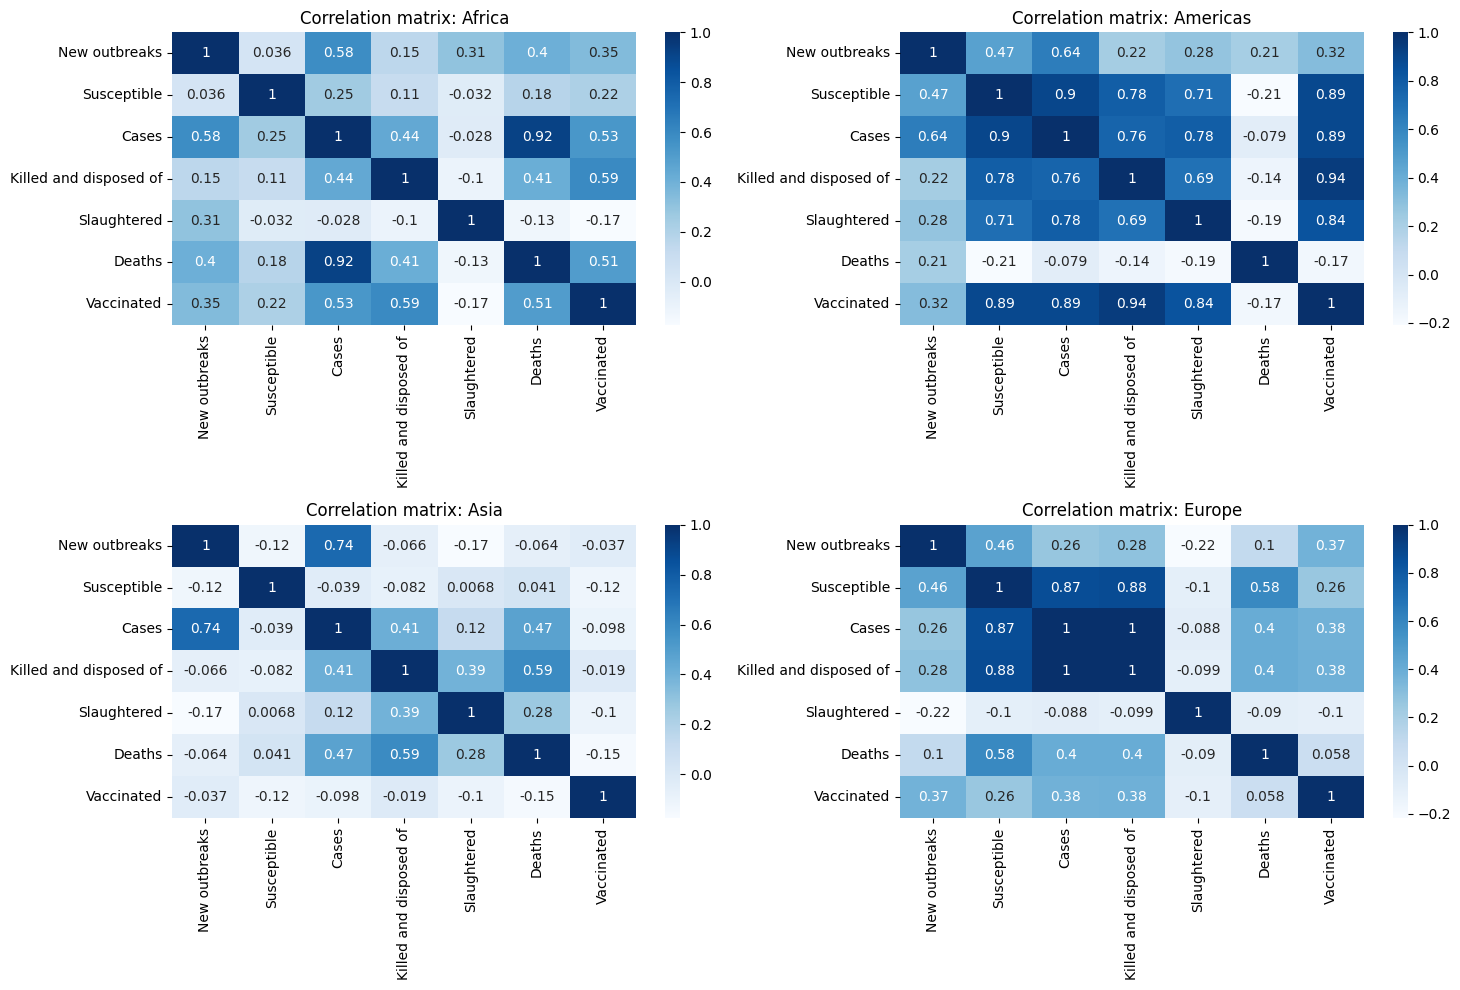

In [ ]:
# Plot correlation matrices per world region
fig, axs = plt.subplots(2,2, figsize = (15,10))

for ireg, reg in enumerate(regions):
  plt.subplot(2,2, ireg + 1)

  quant_df = df_grouped.loc[reg][test_vars]
  corr = quant_df.corr()
  sns.heatmap(corr, cmap = 'Blues', annot = True)
  plt.title(f'Correlation matrix: {reg}')

plt.tight_layout()

save_fig2colab('World regions correlation matrices')
plt.show()

**Post-hoc analysis**

Considering the perfect correlation between cases and killed and disposed of in Europe, a linear regression will be performed to see if cases can predict culling rates. In other words, is Europe's strategy for dealing with FMD cases mass culling?

In [ ]:
# Try Linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Define predictor and dependent variable
X = df_grouped.loc['Europe']['Killed and disposed of']
y = df_grouped.loc['Europe']['Cases']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [ ]:
# Select model
model = LinearRegression()

# Fit model
model.fit(X_train.values.reshape(-1,1),y_train.values)

# Test model on data
y_pred = model.predict(X_test.values.reshape(-1,1))

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))

0.998193850967025
1012.2730109878418


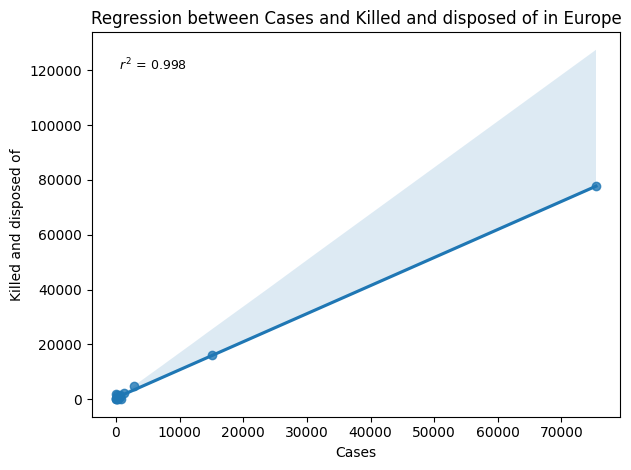

In [ ]:
# Plot regression analysis results
fig = plt.figure()
sns.regplot(x = 'Cases', y = 'Killed and disposed of', data = df_grouped.loc['Europe'])
plt.title('Regression between Cases and Killed and disposed of in Europe')

plt.text(0, 120000 ,f' $r^2$ = {round(r2_score(y_test,y_pred),3)}', fontsize=9) #add text

fig.tight_layout()

save_fig2colab('Regression between Cases and Killed and disposed of in Europe')
plt.show()

**Post-hoc regression analyses including data from all world regions**

The goal is to see if a variable like vaccinated can predict the count of cases.

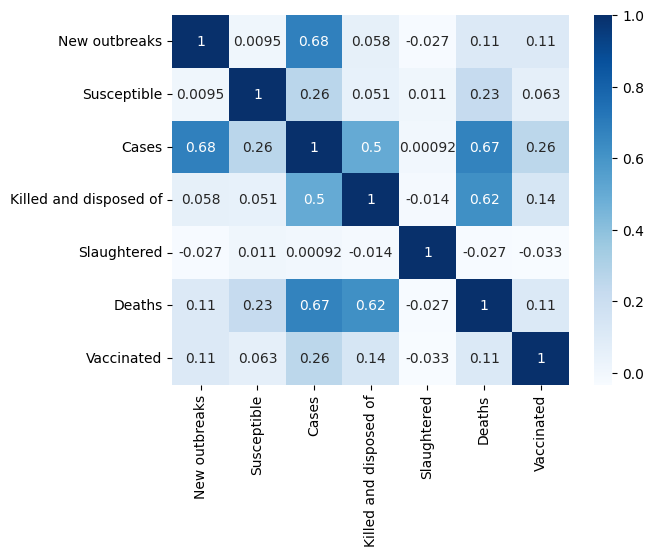

In [ ]:
# See which variables are correlated
quant_df = df_grouped[test_vars] # Create temporary dataset with quantitative data
corr = quant_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

file = 'correlation heatmap.png'
save_fig2colab(file)

**Observations**

New outbreaks, cases and deaths are highly correlated and shouldn't be included in the same model.

Same with cases, killed and disposed of and deaths.

In [ ]:
# Perform more complex regression analyses
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define target and feature variables for model
y = df_grouped['New outbreaks']

features = ['Vaccinated','Susceptible']
X = df_grouped[features]

In [ ]:
# Split data into training and testing sets
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

# Model is random forest
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)

print(r2_score(val_y, preds))
print(mean_absolute_error(val_y, preds))
print(preds-val_y)

0.46721725814116377
1886.5774117647059
World region
Asia       -1465.210
Americas      82.340
Asia        5546.750
Europe       426.130
Asia        4438.920
Asia        3654.080
Asia       -6395.470
Asia        1605.190
Americas      98.460
Europe         8.678
Americas     377.910
Africa      1258.250
Africa      -681.400
Americas      11.678
Europe       -53.350
Africa       824.800
Africa      5143.200
Name: New outbreaks, dtype: float64
